In [182]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\798065\.cache\kagglehub\datasets\kumarajarshi\life-expectancy-who\versions\1


In [273]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv(path + "\\Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


___
## Renomeando as colunas
___

In [184]:
nomes_colunas = {'Country': 'pais', 'Year': 'ano', 'Status': 'status', 'Life expectancy ': 'expectativa_vida', 'Adult Mortality': 'mortalidade_adulta', 'infant deaths': 'mortes_infanis', 
                 'Alcohol': 'consumo_alcool', 'percentage expenditure': 'pct_despesa_saude_pib', 'Hepatitis B': 'vacina_hep_b_crianca', 'Measles ': 'relato_sarampo', ' BMI ': 'IMC', 
                 'under-five deaths ': 'mortalidade_5anos', 'Polio': 'vacina_poliomelite_crianca', 'Total expenditure': 'pct_despesa_saude', 'Diphtheria ': 'vacina_difteria_crianca', 
                 ' HIV/AIDS': 'morte_HIV_4anos', 'GDP': 'PIB', 'Population': 'populacao', ' thinness  1-19 years': 'magreza_10_19', ' thinness 5-9 years': 'magreza_5_9', 
                 'Income composition of resources': 'composicao_recursos_renda', 'Schooling': 'escolaridade'}

In [185]:
mydf = df.rename(columns=nomes_colunas)
mydf.columns

Index(['pais', 'ano', 'status', 'expectativa_vida', 'mortalidade_adulta',
       'mortes_infanis', 'consumo_alcool', 'pct_despesa_saude_pib',
       'vacina_hep_b_crianca', 'relato_sarampo', 'IMC', 'mortalidade_5anos',
       'vacina_poliomelite_crianca', 'pct_despesa_saude',
       'vacina_difteria_crianca', 'morte_HIV_4anos', 'PIB', 'populacao',
       'magreza_10_19', 'magreza_5_9', 'composicao_recursos_renda',
       'escolaridade'],
      dtype='object')

___
## Calculando a pct de nulos
___

In [186]:
print('Porcentagem de nulos para cada variável:','\n',(mydf.isnull().sum()/mydf.shape[0])*100)

Porcentagem de nulos para cada variável: 
 pais                           0.000000
ano                            0.000000
status                         0.000000
expectativa_vida               0.340368
mortalidade_adulta             0.340368
mortes_infanis                 0.000000
consumo_alcool                 6.603131
pct_despesa_saude_pib          0.000000
vacina_hep_b_crianca          18.822328
relato_sarampo                 0.000000
IMC                            1.157250
mortalidade_5anos              0.000000
vacina_poliomelite_crianca     0.646698
pct_despesa_saude              7.692308
vacina_difteria_crianca        0.646698
morte_HIV_4anos                0.000000
PIB                           15.248468
populacao                     22.191967
magreza_10_19                  1.157250
magreza_5_9                    1.157250
composicao_recursos_renda      5.684139
escolaridade                   5.547992
dtype: float64


___
## Verificando os países em cada ano
___

In [187]:
## Quantidade de paises em cada ano
for i in mydf.ano.unique():
    print('Número de países em', i, ':', len(mydf[mydf['ano'] == i].pais.unique()))

## Fazer um looping do ano de 2013 com os outros anos para saber quais países estão faltando
for i in mydf.ano.unique():
    diff_2013 = mydf[mydf['ano'] == 2013][~mydf[mydf['ano'] == 2013]['pais'].isin(mydf[mydf['ano'] == i]['pais'])]
    print('Países faltando em', i, ':', diff_2013.pais.unique())


Número de países em 2015 : 183
Número de países em 2014 : 183
Número de países em 2013 : 193
Número de países em 2012 : 183
Número de países em 2011 : 183
Número de países em 2010 : 183
Número de países em 2009 : 183
Número de países em 2008 : 183
Número de países em 2007 : 183
Número de países em 2006 : 183
Número de países em 2005 : 183
Número de países em 2004 : 183
Número de países em 2003 : 183
Número de países em 2002 : 183
Número de países em 2001 : 183
Número de países em 2000 : 183
Países faltando em 2015 : ['Cook Islands' 'Dominica' 'Marshall Islands' 'Monaco' 'Nauru' 'Niue'
 'Palau' 'Saint Kitts and Nevis' 'San Marino' 'Tuvalu']
Países faltando em 2014 : ['Cook Islands' 'Dominica' 'Marshall Islands' 'Monaco' 'Nauru' 'Niue'
 'Palau' 'Saint Kitts and Nevis' 'San Marino' 'Tuvalu']
Países faltando em 2013 : []
Países faltando em 2012 : ['Cook Islands' 'Dominica' 'Marshall Islands' 'Monaco' 'Nauru' 'Niue'
 'Palau' 'Saint Kitts and Nevis' 'San Marino' 'Tuvalu']
Países faltando em 

In [188]:
## Fazer um looping para todos os anos
anos = mydf.ano.unique()
for i in mydf.ano.unique():
    for j in anos:
        if i != j:
            all_diff = mydf[mydf['ano'] == i][~mydf[mydf['ano'] == i]['pais'].isin(mydf[mydf['ano'] == j]['pais'])]
            print('Países faltando em', j, 'em relação a', i, ':', all_diff.pais.unique())

Países faltando em 2014 em relação a 2015 : []
Países faltando em 2013 em relação a 2015 : []
Países faltando em 2012 em relação a 2015 : []
Países faltando em 2011 em relação a 2015 : []
Países faltando em 2010 em relação a 2015 : []
Países faltando em 2009 em relação a 2015 : []
Países faltando em 2008 em relação a 2015 : []
Países faltando em 2007 em relação a 2015 : []
Países faltando em 2006 em relação a 2015 : []
Países faltando em 2005 em relação a 2015 : []
Países faltando em 2004 em relação a 2015 : []
Países faltando em 2003 em relação a 2015 : []
Países faltando em 2002 em relação a 2015 : []
Países faltando em 2001 em relação a 2015 : []
Países faltando em 2000 em relação a 2015 : []
Países faltando em 2015 em relação a 2014 : []
Países faltando em 2013 em relação a 2014 : []
Países faltando em 2012 em relação a 2014 : []
Países faltando em 2011 em relação a 2014 : []
Países faltando em 2010 em relação a 2014 : []
Países faltando em 2009 em relação a 2014 : []
Países faltan

In [189]:
## Analisando as osbservações nulas para os 10 países que 'sobraram' em 2013
(mydf[(mydf['ano'] == 2013) & (mydf['pais'].isin(diff_2013.pais.unique()))].isnull().sum()/mydf[(mydf['ano'] == 2013) & (mydf['pais'].isin(diff_2013.pais.unique()))].shape[0])*100

pais                            0.0
ano                             0.0
status                          0.0
expectativa_vida              100.0
mortalidade_adulta            100.0
mortes_infanis                  0.0
consumo_alcool                 10.0
pct_despesa_saude_pib           0.0
vacina_hep_b_crianca            0.0
relato_sarampo                  0.0
IMC                            20.0
mortalidade_5anos               0.0
vacina_poliomelite_crianca      0.0
pct_despesa_saude               0.0
vacina_difteria_crianca         0.0
morte_HIV_4anos                 0.0
PIB                            50.0
populacao                      80.0
magreza_10_19                  20.0
magreza_5_9                    20.0
composicao_recursos_renda      70.0
escolaridade                   30.0
dtype: float64

In [190]:
## Como a quantidade de nulos é muito alta para o nosso target para esses únicos 10 países em 2013, vamos retirar esses países do dataset
df_filtrado = mydf[~mydf['pais'].isin(diff_2013.pais.unique())]

## Verificando a porcentagem de nulos após a retirada dos 10 países
(df_filtrado.isna().sum()/df_filtrado.shape[0])*100

pais                           0.000000
ano                            0.000000
status                         0.000000
expectativa_vida               0.000000
mortalidade_adulta             0.000000
mortes_infanis                 0.000000
consumo_alcool                 6.591530
pct_despesa_saude_pib          0.000000
vacina_hep_b_crianca          18.886612
relato_sarampo                 0.000000
IMC                            1.092896
mortalidade_5anos              0.000000
vacina_poliomelite_crianca     0.648907
pct_despesa_saude              7.718579
vacina_difteria_crianca        0.648907
morte_HIV_4anos                0.000000
PIB                           15.129781
populacao                     21.994536
magreza_10_19                  1.092896
magreza_5_9                    1.092896
composicao_recursos_renda      5.464481
escolaridade                   5.464481
dtype: float64

___
## Plotando o comportamento do nosso target
___

Text(0, 0.5, 'Frequência')

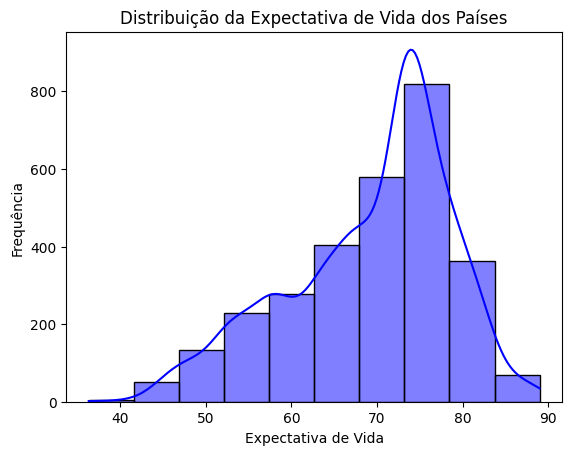

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plotando a distribuição da coluna 'valor1'
sns.histplot(df_filtrado['expectativa_vida'], kde=True, bins = 10, color = 'blue')  # kde=True para adicionar a linha de densidade

# Configurações do gráfico
plt.title('Distribuição da Expectativa de Vida dos Países')
plt.xlabel('Expectativa de Vida')
plt.ylabel('Frequência')


___
## Plotando o comportamento dos missings em relação ao target
___

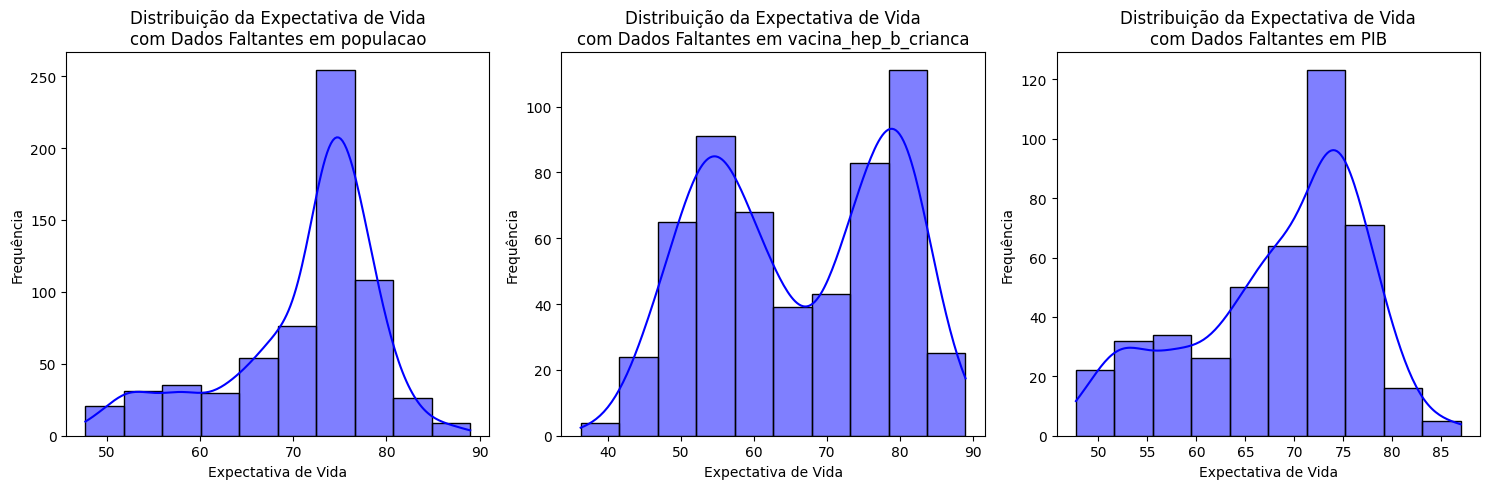

In [192]:
altos_missings = ['populacao', 'vacina_hep_b_crianca', 'PIB']

num_graficos = len(altos_missings)
fig, axes = plt.subplots(1, num_graficos, figsize=(15, 5))

# Loop para criar os gráficos
for ax, i in zip(axes, altos_missings):
    df_aux = df_filtrado[df_filtrado[i].isna()]
    sns.histplot(data=df_aux, x='expectativa_vida', kde=True, bins=10, color='blue', ax=ax)  # Adiciona o gráfico no subplot correspondente
    ax.set_title(f'Distribuição da Expectativa de Vida\ncom Dados Faltantes em {i}')
    ax.set_xlabel('Expectativa de Vida')
    ax.set_ylabel('Frequência')

# Ajustar layout
plt.tight_layout()
plt.show()

In [193]:
df_missings = df_filtrado[df_filtrado['populacao'].isna()][['pais', 'ano']]

# Criar um dicionário para armazenar os resultados
dicionario_pais_anos = {}

# Preencher o dicionário
for _, row in df_missings.iterrows():
    pais = row['pais']
    ano = row['ano']
    
    if pais not in dicionario_pais_anos:
        dicionario_pais_anos[pais] = []
    
    dicionario_pais_anos[pais].append(ano)

print(len(df_missings.pais.unique()))
print('Países com dados faltantes em "populacao" e os anos correspondentes:', dicionario_pais_anos)

41
Países com dados faltantes em "populacao" e os anos correspondentes: {'Antigua and Barbuda': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Bahamas': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Bahrain': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Barbados': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Bolivia (Plurinational State of)': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Brunei Darussalam': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], "Côte d'Ivoire": [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Congo': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Cu

In [194]:
df_missings = df_filtrado[df_filtrado['vacina_hep_b_crianca'].isna()][['pais', 'ano']]

# Criar um dicionário para armazenar os resultados
dicionario_pais_anos = {}

# Preencher o dicionário
for _, row in df_missings.iterrows():
    pais = row['pais']
    ano = row['ano']
    
    if pais not in dicionario_pais_anos:
        dicionario_pais_anos[pais] = []
    
    dicionario_pais_anos[pais].append(ano)

print(len(df_missings.pais.unique()))
print(df_missings.pais.unique())
print('Países com dados faltantes em "vacina_hep_b_crianca" e os anos correspondentes:', dicionario_pais_anos)

98
['Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Australia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Benin'
 'Bosnia and Herzegovina' 'Burkina Faso' 'Burundi' "Côte d'Ivoire"
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'Comoros' 'Congo' 'Croatia' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Finland' 'Gabon'
 'Ghana' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Ireland' 'Jamaica' 'Japan' 'Kenya'
 "Lao People's Democratic Republic" 'Lesotho' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Malta' 'Mauritania' 'Montenegro' 'Mozambique' 'Myanmar'
 'Namibia' 'Nepal' 'Netherlands' 'Niger' 'Nigeria' 'Norway' 'Pakistan'
 'Panama' 'Paraguay' 'Peru' 'Russian Federation' 'Rwanda' 'Saint Lucia'
 'Saint Vincent and the Grenadines' 'Sao Tome and Principe' 'Senegal'
 'Serbia' 'Sierra Le

In [195]:
df_missings = df_filtrado[df_filtrado['PIB'].isna()][['pais', 'ano']]

# Criar um dicionário para armazenar os resultados
dicionario_pais_anos = {}

# Preencher o dicionário
for _, row in df_missings.iterrows():
    pais = row['pais']
    ano = row['ano']
    
    if pais not in dicionario_pais_anos:
        dicionario_pais_anos[pais] = []
    
    dicionario_pais_anos[pais].append(ano)

print(len(df_missings.pais.unique()))
print(df_missings.pais.unique())
print('Países com dados faltantes em "PIB" e os anos correspondentes:', dicionario_pais_anos)

33
['Bahamas' 'Bolivia (Plurinational State of)' "Côte d'Ivoire" 'Congo'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Egypt' 'Eritrea' 'Gambia'
 'Iran (Islamic Republic of)' 'Iraq' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Libya'
 'Micronesia (Federated States of)' 'Papua New Guinea' 'Republic of Korea'
 'Republic of Moldova' 'Saint Lucia' 'Saint Vincent and the Grenadines'
 'Sao Tome and Principe' 'Slovakia' 'Somalia' 'South Sudan'
 'Syrian Arab Republic' 'The former Yugoslav republic of Macedonia'
 'United Kingdom of Great Britain and Northern Ireland'
 'United Republic of Tanzania' 'United States of America'
 'Venezuela (Bolivarian Republic of)' 'Viet Nam' 'Yemen']
Países com dados faltantes em "PIB" e os anos correspondentes: {'Bahamas': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000], 'Bolivia (Plurinational State of)': [2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 20

In [196]:
df_filtrado2 = df_filtrado.drop(columns=['populacao', 'vacina_hep_b_crianca', 'PIB'])
df_filtrado2.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [197]:
## Verificando a porcentagem de nulos após a retirada dos 10 países
(df_filtrado2.isna().sum()/df_filtrado2.shape[0])*100

pais                          0.000000
ano                           0.000000
status                        0.000000
expectativa_vida              0.000000
mortalidade_adulta            0.000000
mortes_infanis                0.000000
consumo_alcool                6.591530
pct_despesa_saude_pib         0.000000
relato_sarampo                0.000000
IMC                           1.092896
mortalidade_5anos             0.000000
vacina_poliomelite_crianca    0.648907
pct_despesa_saude             7.718579
vacina_difteria_crianca       0.648907
morte_HIV_4anos               0.000000
magreza_10_19                 1.092896
magreza_5_9                   1.092896
composicao_recursos_renda     5.464481
escolaridade                  5.464481
dtype: float64

paises_escolaridade_na = df_filtrado[df_filtrado['escolaridade'].isna()]['pais'].unique()

In [198]:
paises_escolaridade_na = df_filtrado2[df_filtrado2['vacina_poliomelite_crianca'].isna()]
paises_escolaridade_na

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
1742,Montenegro,2005,Developing,73.6,133.0,0,NaN,527.307672,0,55.7,0,NaN,8.46,NaN,0.1,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,0,55.0,0,NaN,8.45,NaN,0.1,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,0,54.2,0,NaN,8.91,NaN,0.1,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,0,53.5,0,NaN,8.33,NaN,0.1,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,0,52.7,0,NaN,8.23,NaN,0.1,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,0,51.9,0,NaN,7.32,NaN,0.1,2.6,2.7,0.000,0.0
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,0,NaN,41,NaN,NaN,NaN,4.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,0,NaN,42,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,0,NaN,42,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,0,NaN,43,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0


In [200]:
df_filtrado2[(df_filtrado2['pais'] == 'South Sudan') | (df_filtrado2['pais'] == 'Sudan')]

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,878,NaN,39,41.0,NaN,31.0,3.4,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,441,NaN,39,44.0,2.74,39.0,3.5,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,525,NaN,40,5.0,2.62,45.0,3.6,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,1952,NaN,40,64.0,2.77,59.0,3.8,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,1256,NaN,41,66.0,NaN,61.0,3.9,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,0,NaN,41,NaN,NaN,NaN,4.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,0,NaN,42,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,0,NaN,42,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,0,NaN,43,NaN,NaN,NaN,4.2,NaN,NaN,0.000,0.0
2418,South Sudan,2006,Developing,52.5,383.0,28,NaN,0.000000,0,NaN,43,NaN,NaN,NaN,4.1,NaN,NaN,0.000,0.0


In [180]:
## Removendo o pais sudao do Sul, pois possui muitos valores nulos ou zerados e o Sudão por IMC, e as magrezas serem nulas e eu não saber como substituir
df_filtrado3 = df_filtrado2[(df_filtrado2['pais'] != 'South Sudan') & (df_filtrado2['pais'] != 'Sudan')]
vacina_poliomelite_criancae_na = df_filtrado3[df_filtrado3['vacina_poliomelite_crianca'].isna()]
vacina_poliomelite_criancae_na

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
1742,Montenegro,2005,Developing,73.6,133.0,0,NaN,527.307672,0,55.7,0,NaN,8.46,NaN,0.1,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,0,55.0,0,NaN,8.45,NaN,0.1,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,0,54.2,0,NaN,8.91,NaN,0.1,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,0,53.5,0,NaN,8.33,NaN,0.1,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,0,52.7,0,NaN,8.23,NaN,0.1,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,0,51.9,0,NaN,7.32,NaN,0.1,2.6,2.7,0.000,0.0
2615,Timor-Leste,2001,Developing,59.4,269.0,3,0.50,6.556583,0,12.3,4,NaN,3.75,NaN,0.1,12.1,12.2,0.470,9.8
2616,Timor-Leste,2000,Developing,58.7,276.0,3,0.50,49.069672,0,11.9,4,NaN,3.26,NaN,0.1,12.2,12.2,0.000,0.0


In [174]:
df_filtrado3[df_filtrado3['pct_despesa_saude'].isna()]

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,63,59.5,24,95.0,NaN,95.0,0.1,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,118,23.3,98,7.0,NaN,64.0,1.9,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,0,47.7,0,86.0,NaN,99.0,0.2,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,0,62.8,9,93.0,NaN,94.0,0.1,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,33,54.9,1,96.0,NaN,94.0,0.1,2.1,2.2,0.741,12.7
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,74,66.6,1,93.0,NaN,93.0,0.1,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.0,309,57.6,0,93.0,NaN,93.0,0.1,1.9,2.1,0.892,15.9
144,Azerbaijan,2015,Developing,72.7,118.0,5,NaN,0.0,0,52.5,6,98.0,NaN,96.0,0.1,2.8,2.9,0.758,12.7
160,Bahamas,2015,Developing,76.1,147.0,0,NaN,0.0,0,64.5,0,95.0,NaN,95.0,0.1,2.5,2.5,0.790,12.6
176,Bahrain,2015,Developing,76.9,69.0,0,NaN,0.0,0,63.6,0,98.0,NaN,98.0,0.1,6.2,6.1,0.823,14.5


In [179]:
## Verificando a porcentagem de nulos após a retirada dos 10 países
(df_filrado4.isna().sum()/df_filrado4.shape[0])*100

pais                          0.000000
ano                           0.000000
status                        0.000000
expectativa_vida              0.000000
mortalidade_adulta            0.000000
mortes_infanis                0.000000
consumo_alcool                0.000000
pct_despesa_saude_pib         0.000000
relato_sarampo                0.000000
IMC                           0.000000
mortalidade_5anos             0.000000
vacina_poliomelite_crianca    0.000000
pct_despesa_saude             0.000000
vacina_difteria_crianca       0.000000
morte_HIV_4anos               0.000000
magreza_10_19                 0.000000
magreza_5_9                   0.000000
composicao_recursos_renda     5.524862
escolaridade                  5.524862
dtype: float64

In [177]:
df_filrado4.shape

(2896, 19)

In [178]:
df.shape

(2938, 22)

In [205]:
# 1. Calcular a média de consumo de álcool por país, ignorando os valores ausentes
media_consumo = df_filtrado3.groupby('pais')['consumo_alcool'].mean()

# 2. Criar uma função para imputar a média nos valores ausentes
def imputar_media(row, coluna):
    if pd.isnull(row[coluna]):
        return media_consumo[row['pais']]
    else:
        return row[coluna]

# 3. Aplicar a função ao DataFrame
df_filrado4 = df_filtrado3.copy()
df_filrado4['consumo_alcool'] = df_filrado4.apply(imputar_media, axis=1, args=('consumo_alcool',))
df_filrado4['vacina_poliomelite_crianca'] = df_filrado4.apply(imputar_media, axis=1, args=('vacina_poliomelite_crianca',))
df_filrado4['vacina_difteria_crianca'] = df_filrado4.apply(imputar_media, axis=1, args=('vacina_difteria_crianca',))
df_filrado4['pct_despesa_saude'] = df_filrado4.apply(imputar_media, axis=1, args=('pct_despesa_saude',))

df_filrado4.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [202]:
df_cleaned = df_filrado4.dropna()
df_cleaned.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [203]:
## Verificando a porcentagem de nulos após a retirada dos 10 países
(df_cleaned.isna().sum()/df_cleaned.shape[0])*100

pais                          0.0
ano                           0.0
status                        0.0
expectativa_vida              0.0
mortalidade_adulta            0.0
mortes_infanis                0.0
consumo_alcool                0.0
pct_despesa_saude_pib         0.0
relato_sarampo                0.0
IMC                           0.0
mortalidade_5anos             0.0
vacina_poliomelite_crianca    0.0
pct_despesa_saude             0.0
vacina_difteria_crianca       0.0
morte_HIV_4anos               0.0
magreza_10_19                 0.0
magreza_5_9                   0.0
composicao_recursos_renda     0.0
escolaridade                  0.0
dtype: float64

In [204]:
df_cleaned.shape

(2736, 19)

In [269]:
import plotly.express as px

fig = px.box(df_cleaned, x='pais', y='relato_sarampo', title='Expectativa de Vida por País', width=1700, height=1000)

# Mostrar o gráfico
fig.show()

In [272]:
df.columns

Index(['country', 'year', 'variable'], dtype='object')

In [275]:
df[df['Country'] == 'Madagascar']['Population']

1554     2423488.0
1555     2358981.0
1556    22961146.0
1557    22346573.0
1558    21743949.0
1559     2115164.0
1560     2569121.0
1561    19996469.0
1562    19433523.0
1563     1888268.0
1564    18336724.0
1565     1782997.0
1566    17279141.0
1567    16765117.0
1568     1626932.0
1569     1576686.0
Name: Population, dtype: float64

In [251]:
import pandas as pd


# Definir um valor alto, por exemplo, acima de 50
valor_alto = 50

# Função para verificar se há um valor alto seguido de 0 para cada país
def check_high_then_zero(group):
    high_found = False
    for val in group['relato_sarampo']:
        if val > valor_alto:
            high_found = True
        elif high_found and val == 0:
            return True
    return False

# Aplicar a função em cada grupo de país
result = df_cleaned.groupby('pais').apply(check_high_then_zero)

print(result)


pais
Afghanistan                                  False
Albania                                      False
Algeria                                       True
Angola                                       False
Antigua and Barbuda                          False
Argentina                                    False
Armenia                                      False
Australia                                     True
Austria                                       True
Azerbaijan                                    True
Bahamas                                      False
Bahrain                                      False
Bangladesh                                   False
Barbados                                     False
Belarus                                       True
Belgium                                       True
Belize                                       False
Benin                                        False
Bhutan                                       False
Bolivia (Plurinational Sta

C:\Users\798065\AppData\Local\Temp\ipykernel_10560\399961027.py:18: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [264]:
# Calcular a média da variável para cada país
mean_by_pais = df_cleaned.groupby('pais')['relato_sarampo'].mean()

# Função para imputar valores de acordo com a média do país
def impute_zero_with_mean(group):
    if result[group.name]:  # Verifica se o país teve a condição atendida
        group['relato_sarampo'] = group['relato_sarampo'].replace(0, mean_by_pais[group.name])
    return group

# Aplicar a imputação
df_cleaned_imputed = df_cleaned.groupby('pais').apply(impute_zero_with_mean).reset_index(drop=True)

df_cleaned_imputed.head()

C:\Users\798065\AppData\Local\Temp\ipykernel_10560\1388801541.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154.0,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492.0,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430.0,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787.0,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013.0,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [268]:
df_cleaned_imputed[(df_cleaned_imputed['pais'] == 'Madagascar')]

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
1488,Madagascar,2015,Developing,65.5,22.0,28,0.82,0.000000,3.0,2.5,38,71.0,0.82,69.0,0.3,7.1,7.1,0.511,10.3
1489,Madagascar,2014,Developing,65.1,225.0,29,0.01,5.339066,3.0,2.0,39,73.0,3.40,73.0,0.3,7.2,7.1,0.509,10.3
1490,Madagascar,2013,Developing,64.7,23.0,29,0.87,79.508825,6.0,19.5,40,73.0,4.15,74.0,0.4,7.3,7.2,0.508,10.3
1491,Madagascar,2012,Developing,64.3,235.0,30,0.87,59.979145,2.0,19.0,42,71.0,3.46,7.0,0.4,7.4,7.3,0.506,10.2
1492,Madagascar,2011,Developing,63.8,241.0,31,0.97,78.799672,0.0,18.5,43,73.0,4.24,73.0,0.4,7.5,7.4,0.504,10.2
1493,Madagascar,2010,Developing,63.3,248.0,32,1.03,76.604422,1.0,18.0,45,7.0,4.86,7.0,0.5,7.6,7.5,0.503,10.2
1494,Madagascar,2009,Developing,62.8,254.0,33,0.91,71.166012,0.0,17.6,47,76.0,4.70,77.0,0.5,7.7,7.6,0.500,9.7
1495,Madagascar,2008,Developing,62.3,259.0,34,0.68,6.448763,3.0,17.1,49,77.0,4.50,77.0,0.5,7.8,7.7,0.491,9.4
1496,Madagascar,2007,Developing,61.9,261.0,35,0.71,55.430345,0.0,16.7,51,83.0,4.98,84.0,0.6,7.9,7.8,0.483,9.1
1497,Madagascar,2006,Developing,61.4,263.0,36,0.68,38.418704,2.0,16.3,54,83.0,5.11,85.0,0.6,8.0,7.9,0.478,9.0


In [212]:
import plotly.graph_objects as go

# Criar o boxplot para 'consumo_alcool'
fig = go.Figure()

# Adicionando um boxplot para consumo_alcool
fig.add_trace(go.Box(
    y=df_cleaned['consumo_alcool'],
    name='Consumo de Álcool',
    # boxmean='sd'  # Adiciona a média e o desvio padrão
))

# Configurar o layout
fig.update_layout(
    title='Boxplots de Consumo de Álcool',
    yaxis_title='Valores',
    boxmode='group'  # Agrupa os boxplots
)

# Exibir o gráfico
fig.show()


In [214]:
import plotly.graph_objects as go

# Criar o boxplot para 'mortes_infanis'],'
fig = go.Figure()

# Adicionando um boxplot para mortes_infanis'],
fig.add_trace(go.Box(
    y=df_cleaned['mortes_infanis'],
    name='Mortes Infantis',
    # boxmean='sd'  # Adiciona a média e o desvio padrão
))

# Configurar o layout
fig.update_layout(
    title='Boxplots de Mortes Infantis',
    yaxis_title='Valores',
    boxmode='group'  # Agrupa os boxplots
)

# Exibir o gráfico
fig.show()


In [218]:
import plotly.graph_objects as go

# Criar o boxplot para 'mortes_infanis'],'
fig = go.Figure()

# Adicionando um boxplot para mortes_infanis'],
fig.add_trace(go.Box(
    y=df_cleaned['mortalidade_5anos'],
    name='Mortes Infantis',
    # boxmean='sd'  # Adiciona a média e o desvio padrão
))

# Configurar o layout
fig.update_layout(
    title='Boxplots de mortalidade_5anos',
    yaxis_title='Valores',
    boxmode='group'  # Agrupa os boxplots
)

# Exibir o gráfico
fig.show()


In [224]:
df_cleaned[df_cleaned['mortes_infanis'] >= 500]

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
1186,India,2015,Developing,68.3,181.0,910,1.942,0.000000,90387,18.7,1100,86.0,1.942,87.0,0.2,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.070,86.521539,79563,18.1,1200,84.0,4.690,85.0,0.2,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.110,67.672304,13822,17.5,1300,82.0,4.530,83.0,0.2,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.100,64.969645,18668,17.0,1400,79.0,4.390,82.0,0.2,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.000,64.605901,33634,16.4,1500,79.0,4.330,82.0,0.2,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.770,57.733599,31458,15.9,1600,76.0,4.280,79.0,0.2,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.500,0.844186,56188,15.4,1700,73.0,4.380,74.0,0.2,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.930,43.030433,44258,14.9,1800,69.0,4.340,7.0,0.3,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.590,5.234770,41144,14.4,1900,67.0,4.230,64.0,0.3,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.370,34.859427,64185,13.9,2000,66.0,4.250,65.0,0.3,27.1,28.0,0.536,9.7


In [223]:
df_cleaned[df_cleaned['mortalidade_5anos'] >= 500]

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
573,China,2002,Developing,72.7,16.0,422,2.910000,106.359036,58341,21.9,511,86.0,4.790000,86.0,0.1,5.5,4.9,0.600,9.7
574,China,2001,Developing,72.2,11.0,457,2.840000,14.230645,88962,21.2,558,86.0,4.560000,86.0,0.1,5.7,5.0,0.592,9.6
575,China,2000,Developing,71.7,115.0,490,3.060000,17.460574,71093,2.5,608,86.0,4.600000,85.0,0.1,5.9,5.1,0.583,9.5
1186,India,2015,Developing,68.3,181.0,910,1.942000,0.000000,90387,18.7,1100,86.0,1.942000,87.0,0.2,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.070000,86.521539,79563,18.1,1200,84.0,4.690000,85.0,0.2,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.110000,67.672304,13822,17.5,1300,82.0,4.530000,83.0,0.2,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.100000,64.969645,18668,17.0,1400,79.0,4.390000,82.0,0.2,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.000000,64.605901,33634,16.4,1500,79.0,4.330000,82.0,0.2,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.770000,57.733599,31458,15.9,1600,76.0,4.280000,79.0,0.2,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.500000,0.844186,56188,15.4,1700,73.0,4.380000,74.0,0.2,27.0,27.8,0.563,10.5


In [221]:
import plotly.graph_objects as go

# Criar o boxplot para 'mortes_infanis'],'
fig = go.Figure()

# Adicionando um boxplot para mortes_infanis'],
fig.add_trace(go.Box(
    y=df_cleaned['morte_HIV_4anos'],
    name='Mortes Infantis',
    # boxmean='sd'  # Adiciona a média e o desvio padrão
))

# Configurar o layout
fig.update_layout(
    title='Boxplots de morte_HIV_4anos',
    yaxis_title='Valores',
    boxmode='group'  # Agrupa os boxplots
)

# Exibir o gráfico
fig.show()


In [222]:
df_cleaned[df_cleaned['morte_HIV_4anos'] >= 20]

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,relato_sarampo,IMC,mortalidade_5anos,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
346,Botswana,2005,Developing,51.7,566.0,2,6.37,629.842564,5,32.7,3,96.0,5.62,96.0,20.6,1.0,9.9,0.593,11.9
347,Botswana,2004,Developing,48.1,652.0,2,4.90,469.582390,1,32.2,4,96.0,5.56,96.0,28.4,1.5,1.4,0.580,11.8
348,Botswana,2003,Developing,46.4,693.0,2,5.51,299.367125,59,31.6,4,96.0,4.65,96.0,31.9,1.9,1.8,0.567,11.8
349,Botswana,2002,Developing,46.0,699.0,2,6.41,6.330007,7,31.1,4,97.0,6.47,97.0,34.6,11.4,11.3,0.558,11.9
350,Botswana,2001,Developing,46.7,679.0,2,5.48,306.952735,1,3.5,4,97.0,5.73,97.0,37.2,11.8,11.8,0.560,11.8
351,Botswana,2000,Developing,47.8,647.0,2,5.37,250.891648,2672,29.9,4,97.0,4.64,97.0,38.8,12.3,12.2,0.559,11.7
1481,Lesotho,2008,Developing,47.8,592.0,5,2.75,91.854328,0,28.8,6,86.0,8.85,88.0,27.3,8.0,7.8,0.447,10.7
1482,Lesotho,2007,Developing,46.2,633.0,4,2.69,9.184327,2,28.3,6,87.0,8.47,88.0,30.0,8.4,8.3,0.440,10.6
1483,Lesotho,2006,Developing,45.3,654.0,5,2.61,71.155776,1,27.9,6,88.0,7.12,89.0,34.1,8.8,8.7,0.437,10.7
1484,Lesotho,2005,Developing,44.5,675.0,5,2.67,57.903698,0,27.4,6,88.0,6.30,89.0,34.8,9.3,9.2,0.437,10.7
